In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import glob
import matplotlib.dates as mdates
import numpy as np

In [2]:
def reader(path, first_var):
    '''
    Reads SEMS/DASH data, adds datetime columns

    :param path: path to data file
    :param first_var: the name of the first column label
    :return: pandas DataFrame
    '''
    # Open the file and read the lines
    skip=1
    with open(path, "r") as file:
        # Iterate over the lines
        for line in file:
            # Strip leading and trailing whitespace
            line = line.strip()
            # Check if the line contains column names
            if line.startswith(first_var):
                # Split the line by whitespace and append to the columns list
                columns = line[1:].strip().split("\t")
                break  # Stop reading lines after finding column names
            skip+=1
    # Read the data into a DataFrame, skipping the first 6 rows of comments
    d = pd.read_csv(path, sep='\t', skiprows=skip, names=columns)

    # Creates datetime columns
    if 'DOY.Frac' in d.keys():
        d['dt'] = pd.to_datetime('2024-1-1') + pd.to_timedelta(d['DOY.Frac'], unit='D') - pd.Timedelta(days=1)
    if 'StartTimeSt' in d.keys():
        d['st_dt'] = pd.to_datetime('2024-1-1') + pd.to_timedelta(d['StartTimeSt'], unit='D') - pd.Timedelta(days=1)
    if 'EndTimeSt' in d.keys():
        d['end_dt'] = pd.to_datetime('2024-1-1') + pd.to_timedelta(d['EndTimeSt'], unit='D') - pd.Timedelta(days=1)
    if 'YY/MM/DD' and 'HR:MN:SC' in d.keys():
        d['dt'] = pd.to_datetime(str(20) + d['YY/MM/DD'] + ' ' + d['HR:MN:SC'], format='%Y/%m/%d %H:%M:%S')
    return d

In [3]:
def glob_reader(file_key, first_var, subfolder = './data/'):
    '''
    Reads groups of data files and merges them into one

    :param file_key: shared key in filenames
    :param first_var: the name of the first column label
    :param subfolder: name of the subfolder containing the data
    :return: pandas DataFrame
    '''
    paths = sorted(glob.glob(subfolder+'*'+file_key+'*'))
    d = []
    for i in range(0, len(paths)):
        d.append(reader(paths[i], first_var))
    d = pd.concat(d).reset_index()
    return d

In [4]:
dopc = glob_reader('OPC_210', '#YY/MM/DD', subfolder = '../data/DASH_test_240516/')
hopc = glob_reader('OPC_212', '#YY/MM/DD', subfolder = '../data/DASH_test_240516/')

In [23]:
#samp_param = glob_reader('DASH_SAMP_PARAM_240516_174701', first_var='#StartTimeSt', subfolder='../data/DASH_test_240516/')
samp_param = glob_reader('DASH_SAMP_PARAM_240516_175450', first_var='#StartTimeSt', subfolder='../data/DASH_test_240516/')
dopc1Hz = glob_reader('OPC_210', '#YY/MM/DD', subfolder = '../data/DASH_test_240516/')
hopc1Hz = glob_reader('OPC_212', '#YY/MM/DD', subfolder = '../data/DASH_test_240516/')

In [24]:
samp_param

,index,StartTimeSt,EndTimeSt,StartYr,EndYr,StartSecs,EndSecs,Samp_Num,DO_Tot_Cnts,HO_Tot_Cnts,...,HM_Sh_Av,HM_Sh_Sdev,HM_Xs_Targ,HM_Xs_Av,HM_Xs_Sdev,Samp_Xs_Targ,Samp_Xs_Av,Samp_Xs_Sdev,st_dt,end_dt
0,0,137.746451,137.746492,2024,2024,3.1,6.6,0,1,1,...,8.02,0.01,7.9,7.92,0.01,0.5,0.5,0.0,2024-05-16 17:54:53.400960000,2024-05-16 17:54:56.900160000
1,1,137.746498,137.747186,2024,2024,7.1,66.6,1,5,4,...,8.02,0.01,7.9,7.92,0.00,0.5,0.5,0.0,2024-05-16 17:54:57.401280000,2024-05-16 17:55:56.896320000
2,2,137.747192,137.747244,2024,2024,67.1,71.6,2,3,5,...,8.02,0.01,7.9,7.92,0.00,0.5,0.5,0.0,2024-05-16 17:55:57.397440000,2024-05-16 17:56:01.898880000
3,3,137.747250,137.747939,2024,2024,72.1,131.6,3,4,3,...,8.01,0.02,7.9,7.92,0.00,0.5,0.5,0.0,2024-05-16 17:56:02.400000000,2024-05-16 17:57:01.903680000
4,4,137.747944,137.747996,2024,2024,132.1,136.6,4,7,2,...,7.98,0.01,7.9,7.92,0.00,0.5,0.5,0.0,2024-05-16 17:57:02.396159999,2024-05-16 17:57:06.897599999
5,5,137.748002,137.748692,2024,2024,137.1,196.6,5,1,6,...,7.97,0.02,7.9,7.92,0.00,0.5,0.5,0.0,2024-05-16 17:57:07.398720000,2024-05-16 17:58:06.997440000
6,6,137.748698,137.748750,2024,2024,197.1,201.6,6,10,6,...,7.97,0.01,7.9,7.92,0.00,0.5,0.5,0.0,2024-05-16 17:58:07.498560000,2024-05-16 17:58:12.000000000
7,7,137.748756,137.749444,2024,2024,202.1,261.7,7,6,6,...,7.97,0.01,7.9,7.92,0.00,0.5,0.5,0.0,2024-05-16 17:58:12.501120000,2024-05-16 17:59:11.996160000
8,8,137.749450,137.749502,2024,2024,262.2,266.7,8,8,6,...,7.97,0.00,7.9,7.92,0.00,0.5,0.5,0.0,2024-05-16 17:59:12.497280000,2024-05-16 17:59:16.998719999
9,9,137.749508,137.750197,2024,2024,267.2,326.7,9,3,0,...,7.97,0.01,7.9,7.92,0.00,0.5,0.5,0.0,2024-05-16 17:59:17.499840000,2024-05-16 18:00:17.003520000


In [73]:
dopc[(dopc['dt'] >= start) & (dopc['dt'] <= end)].count(numeric_only=True)[columns_with_bin]

bin1     20
bin2     20
bin3     20
bin4     20
bin5     20
         ..
bin68    20
bin69    20
bin70    20
bin71    20
bin72    20
Length: 72, dtype: int64

In [ ]:
def merger(samp_param, dopc, hopc):

    dopc_sum = pd.DataFrame()
    for i in range(0, len(s_p)):
        start = s_p.loc[i,'st_dt']
        end = s_p.loc[i,'end_dt']

        dopc[(dopc['dt'] >= start) & (dopc['dt'] <= end)].sum(numeric_only=True)[columns_with_bin]

    pd.merge()
    return d

In [32]:
s_p = reader('../data/DASH_SAMP_PARAM_240404_090951.dat', '#StartTimeSt')
dopc = glob_reader('OPC_210', '#YY/MM/DD', subfolder = '../data/')
hopc = glob_reader('OPC_212', '#YY/MM/DD', subfolder = '../data/')

In [66]:
columns_with_bin = [col for col in dopc.columns if 'bin' in col]

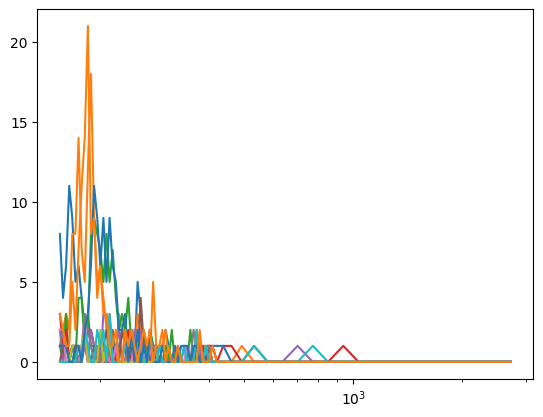

In [70]:
x = [155.0,	158.1,	161.2,	164.5,	167.7,	171.1,	174.5,	178.0,	181.5,	185.2,	188.8,	192.6,	196.5,	200.4,	204.4,	208.4,	212.6,	216.8,	221.2,	225.6,	230.1,	234.7,	239.4,	244.1,	249.0,	254.0,	259.0,	264.2,	269.5,	274.8,	280.3,	285.9,	291.6,	297.4,	303.4,	309.4,	315.6,	321.9,	328.3,	334.9,	341.5,	348.4,	355.3,	362.4,	369.6,	377.0,	384.5,	392.2,	400.0,	408.8,	420.7,	437.7,	461.3,	492.6,	532.4,	580.7,	637.5,	702.3,	773.7,	852.3,	939.0,	1034.4,	1139.5,	1255.3,	1382.9,	1523.5,	1678.3,	1848.9,	2036.9,	2243.9,	2472.0,	2723.2]
for i in range(0, len(s_p)):
    start = s_p.loc[i,'st_dt']
    end = s_p.loc[i,'end_dt']

    y = dopc[(dopc['dt'] >= start) & (dopc['dt'] <= end)].sum(numeric_only=True)[columns_with_bin]

    plt.plot(x, y)
    plt.xscale('log')

In [17]:
s_p

,StartTimeSt,EndTimeSt,StartYr,EndYr,StartSecs,EndSecs,Samp_Num,DO_Tot_Cnts,HO_Tot_Cnts,DO_Mode_Val,...,HM_Sh_Av,HM_Sh_Sdev,HM_Xs_Targ,HM_Xs_Av,HM_Xs_Sdev,Samp_Xs_Targ,Samp_Xs_Av,Samp_Xs_Sdev,st_dt,end_dt
0,95.382103,95.382330,2024,2024,22.3,41.8,0,5,2,0.0,...,8.01,0.01,7.9,7.94,0.00,0.5,0.49,0.0,2024-04-04 09:10:13.699200000,2024-04-04 09:10:33.303360000
1,95.382567,95.382793,2024,2024,62.3,81.9,1,13,7,0.0,...,7.95,0.01,7.9,7.93,0.01,0.5,0.49,0.0,2024-04-04 09:10:53.797440000,2024-04-04 09:11:13.297920000
2,95.383030,95.383256,2024,2024,102.4,121.9,2,5,5,0.0,...,7.97,0.01,7.9,7.93,0.01,0.5,0.49,0.0,2024-04-04 09:11:33.800640000,2024-04-04 09:11:53.301120000
3,95.383493,95.383720,2024,2024,142.4,161.9,3,4,0,0.0,...,7.99,0.01,7.9,7.94,0.00,0.5,0.50,0.0,2024-04-04 09:12:13.803839999,2024-04-04 09:12:33.399360000
4,95.383957,95.384189,2024,2024,182.4,202.4,4,1,0,0.0,...,7.99,0.01,7.9,7.94,0.00,0.5,0.50,0.0,2024-04-04 09:12:53.902080000,2024-04-04 09:13:13.903680000
5,95.384420,95.384646,2024,2024,222.4,241.9,5,1,2,0.0,...,8.00,0.01,7.9,7.94,0.00,0.5,0.50,0.0,2024-04-04 09:13:33.896640000,2024-04-04 09:13:53.397120000
6,95.384883,95.385115,2024,2024,262.4,282.4,6,2,1,0.0,...,8.00,0.01,7.9,7.94,0.00,0.5,0.50,0.0,2024-04-04 09:14:13.899840000,2024-04-04 09:14:33.901439999
7,95.385346,95.385577,2024,2024,302.4,322.4,7,1,3,0.0,...,8.00,0.01,7.9,7.93,0.00,0.5,0.50,0.0,2024-04-04 09:14:53.903040000,2024-04-04 09:15:13.896000000
8,95.385809,95.386040,2024,2024,342.4,362.4,8,0,1,0.0,...,7.99,0.01,7.9,7.93,0.00,0.5,0.50,0.0,2024-04-04 09:15:33.897600000,2024-04-04 09:15:53.899200000
9,95.386272,95.386498,2024,2024,382.4,401.9,9,0,2,0.0,...,7.97,0.01,7.9,7.93,0.00,0.5,0.50,0.0,2024-04-04 09:16:13.900800000,2024-04-04 09:16:33.401280000
